In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def rmsle(y_true, y_pred):
    y_true = np.where(y_true < 0, 0, y_true)  # 실제 값이 0 이하인 경우 0으로 변환
    y_pred = np.where(y_pred < 0, 0, y_pred)  # 예측값이 0 이하인 경우 0으로 변환
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

In [36]:
train = pd.read_csv('rainfall_train.csv')
test = pd.read_csv('rainfall_test.csv')

train = train.drop('Unnamed: 0', axis=1)
train.columns = ['fc_year','fc_month','fc_day','fc_hour','stn4contest','dh','ef_year','ef_month','ef_day','ef_hour',
                 'v01','v02','v03','v04','v05','v06','v07','v08','v09','vv','class_interval']

test = test.drop('Unnamed: 0', axis=1)
test.columns = ['fc_year','fc_month','fc_day','fc_hour','stn4contest','dh','ef_year','ef_month','ef_day','ef_hour',
                 'v01','v02','v03','v04','v05','v06','v07','v08','v09','class_interval']

train['fc_year'] = train['fc_year'].replace({'A': 2020, 'B': 2021, 'C': 2022})
train['ef_year'] = train['ef_year'].replace({'A': 2020, 'B': 2021, 'C': 2022})

test['fc_year'] = test['fc_year'].replace({'A': 2020, 'B': 2021, 'C': 2022})
test['ef_year'] = test['ef_year'].replace({'A': 2020, 'B': 2021, 'C': 2022})

# fc, ef -> datetime으로 변경
train['fc_time'] = pd.to_datetime(train[['fc_year', 'fc_month', 'fc_day', 'fc_hour']].rename(columns={'fc_year': 'year', 'fc_month': 'month', 'fc_day': 'day', 'fc_hour': 'hour'}))
train['ef_time'] = pd.to_datetime(train[['ef_year', 'ef_month', 'ef_day', 'ef_hour']].rename(columns={'ef_year': 'year', 'ef_month': 'month', 'ef_day': 'day', 'ef_hour': 'hour'}))

#vv 결측치 삭제
train = train[train['vv'] != -999]

# 관측소 원핫 인코딩
train = pd.get_dummies(train, columns=['stn4contest'])

# dh 가중치 변환
train['dh'] = 1/train['dh']

train2 = train[train['ef_year']!=2020]


train2.head()

C:\Users\yuth9\AppData\Local\Temp\ipykernel_828\1363874537.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['fc_year'] = train['fc_year'].replace({'A': 2020, 'B': 2021, 'C': 2022})
C:\Users\yuth9\AppData\Local\Temp\ipykernel_828\1363874537.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['ef_year'] = train['ef_year'].replace({'A': 2020, 'B': 2021, 'C': 2022})


,fc_year,fc_month,fc_day,fc_hour,dh,ef_year,ef_month,ef_day,ef_hour,v01,...,stn4contest_STN011,stn4contest_STN012,stn4contest_STN013,stn4contest_STN014,stn4contest_STN015,stn4contest_STN016,stn4contest_STN017,stn4contest_STN018,stn4contest_STN019,stn4contest_STN020
24476,2021,5,1,9,0.333333,2021,5,1,12,98,...,False,False,False,False,False,False,False,False,False,False
24477,2021,5,1,9,0.166667,2021,5,1,15,96,...,False,False,False,False,False,False,False,False,False,False
24478,2021,5,1,9,0.111111,2021,5,1,18,99,...,False,False,False,False,False,False,False,False,False,False
24479,2021,5,1,9,0.083333,2021,5,1,21,99,...,False,False,False,False,False,False,False,False,False,False
24480,2021,5,1,9,0.066667,2021,5,2,0,100,...,False,False,False,False,False,False,False,False,False,False


### 결측치 제거, Standard Scaler, 원핫인코딩

In [34]:
# 모델 학습 및 평가
for name, model in models:
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()
    
    # 성능 지표 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rmsle_value = rmsle(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    tt = end_time - start_time
    
    # 결과 저장
    result = pd.DataFrame({
        'Model': [name],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2],
        'RMSLE': [rmsle_value],
        'MAPE': [mape],
        'TT (Sec)': [tt]
    })
    results = pd.concat([results, result], ignore_index=True)
    
results

C:\Users\yuth9\AppData\Local\Temp\ipykernel_828\2647154567.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,0.897824,9.128454,3.021333,0.152498,0.561546,1.875358e+15,2.013480
1,Gradient Boosting Regressor,0.919205,9.217025,3.035955,0.144274,0.570675,1.956338e+15,138.509441
2,CatBoost Regressor,0.885506,9.363261,3.059945,0.130698,0.555994,1.791880e+15,73.403975
3,Huber Regressor,0.551260,11.060937,3.325799,-0.026918,0.513050,2.781758e+12,26.187277
4,K Neighbors Regressor,0.931938,11.962656,3.458707,-0.110635,0.627788,1.753308e+15,2805.843306
5,Extreme Gradient Boosting,0.891082,9.728722,3.119090,0.096768,0.557564,1.792746e+15,75.465295
6,Random Forest Regressor,1.025811,10.213548,3.195864,0.051755,0.638857,2.344850e+15,564.891132
7,Extra Trees Regressor,0.997848,10.572249,3.251500,0.018453,0.630576,2.191018e+15,510.579014
8,Bayesian Ridge,1.007822,9.309219,3.051101,0.135715,0.602397,2.346949e+15,1.358819
9,Ridge Regression,1.007873,9.309323,3.051118,0.135705,0.602417,2.347092e+15,0.227895


### 가중치(dh)만 v1-v9에 곱해준 데이터

In [38]:
train_w = train2

for i in range(1, 10):
    train_w[f'v{i:02d}'] = train_w['dh'] * train_w[f'v{i:02d}']

train_w.head()

C:\Users\yuth9\AppData\Local\Temp\ipykernel_828\824187383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_w[f'v{i:02d}'] = train_w['dh'] * train_w[f'v{i:02d}']


,fc_year,fc_month,fc_day,fc_hour,dh,ef_year,ef_month,ef_day,ef_hour,v01,...,stn4contest_STN011,stn4contest_STN012,stn4contest_STN013,stn4contest_STN014,stn4contest_STN015,stn4contest_STN016,stn4contest_STN017,stn4contest_STN018,stn4contest_STN019,stn4contest_STN020
24476,2021,5,1,9,0.333333,2021,5,1,12,32.666667,...,False,False,False,False,False,False,False,False,False,False
24477,2021,5,1,9,0.166667,2021,5,1,15,16.000000,...,False,False,False,False,False,False,False,False,False,False
24478,2021,5,1,9,0.111111,2021,5,1,18,11.000000,...,False,False,False,False,False,False,False,False,False,False
24479,2021,5,1,9,0.083333,2021,5,1,21,8.250000,...,False,False,False,False,False,False,False,False,False,False
24480,2021,5,1,9,0.066667,2021,5,2,0,6.666667,...,False,False,False,False,False,False,False,False,False,False


In [39]:
vars = ['fc_year', 'fc_month', 'fc_day','fc_hour', 'ef_year', 'ef_month', 'ef_day', 'ef_hour', 'vv', 'fc_time', 'ef_time', 'class_interval', 'dh']

X = train_w.drop(columns=vars)
y = train_w['vv']

split_index = int(len(train2) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# 모델 학습 및 평가
for name, model in models:
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()
    
    # 성능 지표 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rmsle_value = rmsle(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    tt = end_time - start_time
    
    # 결과 저장
    result = pd.DataFrame({
        'Model': [name],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2],
        'RMSLE': [rmsle_value],
        'MAPE': [mape],
        'TT (Sec)': [tt]
    })
    results = pd.concat([results, result], ignore_index=True)
    
results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,0.897824,9.128454,3.021333,0.152498,0.561546,1.875358e+15,2.013480
1,Gradient Boosting Regressor,0.919205,9.217025,3.035955,0.144274,0.570675,1.956338e+15,138.509441
2,CatBoost Regressor,0.885506,9.363261,3.059945,0.130698,0.555994,1.791880e+15,73.403975
3,Huber Regressor,0.551260,11.060937,3.325799,-0.026918,0.513050,2.781758e+12,26.187277
4,K Neighbors Regressor,0.931938,11.962656,3.458707,-0.110635,0.627788,1.753308e+15,2805.843306
5,Extreme Gradient Boosting,0.891082,9.728722,3.119090,0.096768,0.557564,1.792746e+15,75.465295
6,Random Forest Regressor,1.025811,10.213548,3.195864,0.051755,0.638857,2.344850e+15,564.891132
7,Extra Trees Regressor,0.997848,10.572249,3.251500,0.018453,0.630576,2.191018e+15,510.579014
8,Bayesian Ridge,1.007822,9.309219,3.051101,0.135715,0.602397,2.346949e+15,1.358819
9,Ridge Regression,1.007873,9.309323,3.051118,0.135705,0.602417,2.347092e+15,0.227895


-------------------

In [9]:
vars = ['month', 'day', 'hour','year', 'vv', 'class_interval', 'ef_datetime']

X = df.drop(columns=vars)
y = df['vv']

split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 모델 학습 및 평가
for name, model in models:
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()
    
    # 성능 지표 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rmsle_value = rmsle(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    tt = end_time - start_time
    
    # 결과 저장
    result = pd.DataFrame({
        'Model': [name],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2],
        'RMSLE': [rmsle_value],
        'MAPE': [mape],
        'TT (Sec)': [tt]
    })
    results = pd.concat([results, result], ignore_index=True)
    
results

C:\Users\yuth9\AppData\Local\Temp\ipykernel_23288\2647154567.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,0.901070,12.915748,3.593849,0.285011,0.476420,9.709698e+14,0.548133
1,Gradient Boosting Regressor,0.832396,11.279013,3.358424,0.375617,0.450793,9.000507e+14,53.601619
2,CatBoost Regressor,0.917833,13.222629,3.636293,0.268023,0.483677,9.720811e+14,14.727924
3,Huber Regressor,0.732084,13.316964,3.649242,0.262800,0.424352,4.406138e+14,1.797499
4,K Neighbors Regressor,0.936041,13.981729,3.739215,0.226000,0.519077,8.963120e+14,2.577327
5,Extreme Gradient Boosting,0.880219,12.362008,3.515965,0.315665,0.476664,9.463092e+14,7.622270
6,Random Forest Regressor,1.025105,12.741141,3.569473,0.294677,0.548919,1.369505e+15,130.805939
7,Extra Trees Regressor,0.993252,12.837506,3.582947,0.289342,0.532620,1.240431e+15,23.950194
8,Bayesian Ridge,0.904499,11.515105,3.393391,0.362548,0.490981,1.227008e+15,0.137923
9,Ridge Regression,0.904380,11.514601,3.393317,0.362575,0.490997,1.226476e+15,0.031095


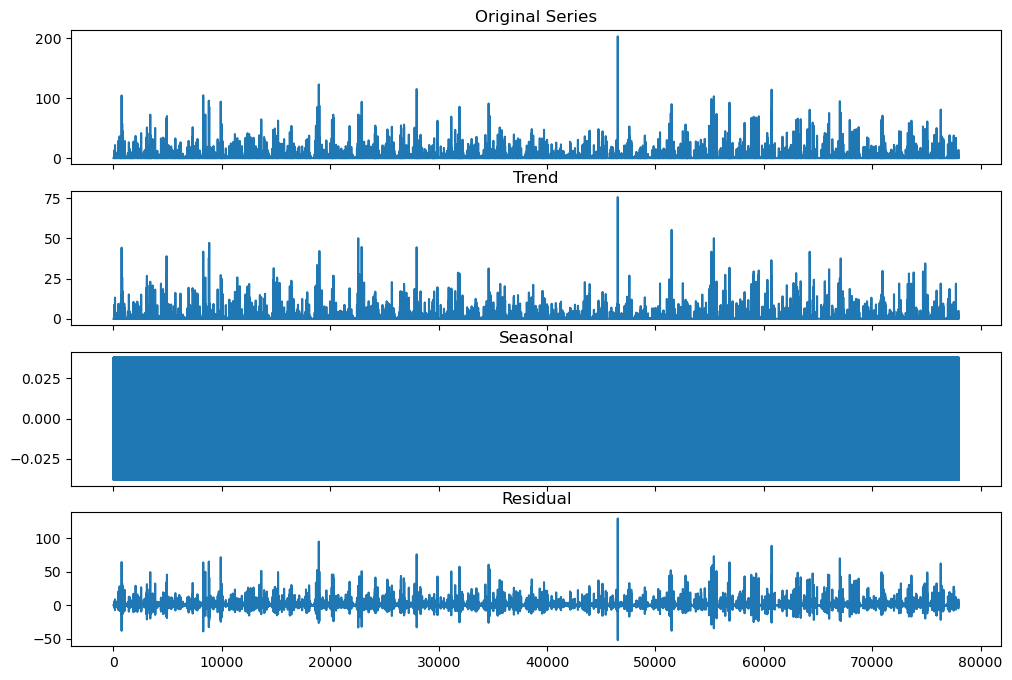

In [20]:
# 시계열 데이터의 계절성 분해
result = seasonal_decompose(df['vv'], model='additive', period=5)

# 분해 결과 시각화
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
result.observed.plot(ax=ax1, title='Original Series')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.show()

In [26]:
df.head()

,stn4contest,ef_datetime,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
0,0,2020-05-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12
1,0,2020-05-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15
2,0,2020-05-01 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18
3,0,2020-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21
4,0,2020-05-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0


In [7]:
df['ef_datetime'] = pd.to_datetime(df['ef_datetime'])
df.set_index('ef_datetime', inplace=True)

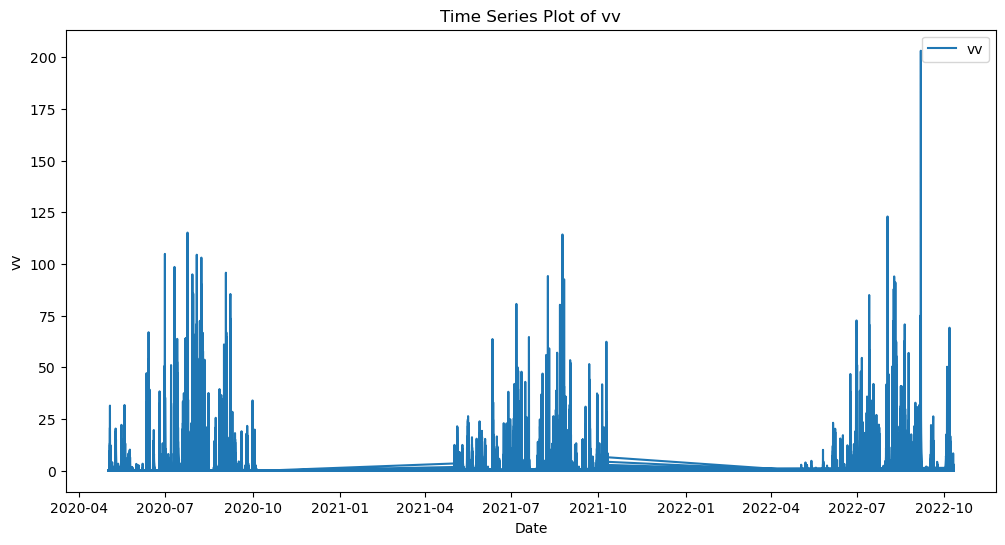

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['vv'], label='vv')
plt.xlabel('Date')
plt.ylabel('vv')
plt.title('Time Series Plot of vv')
plt.legend()
plt.show()

In [22]:
adf_result = adfuller(df['vv'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
for key, value in adf_result[4].items():
    print('Critical Values:')
    print('%s: %.3f' % (key, value))

# 추세를 제거한 데이터에 대한 ADF 테스트
adf_result_trend = adfuller(result.trend.dropna())
print('ADF Statistic (Trend): %f' % adf_result_trend[0])
print('p-value (Trend): %f' % adf_result_trend[1])

# 잔차 데이터에 대한 ADF 테스트
adf_result_resid = adfuller(result.resid.dropna())
print('ADF Statistic (Residual): %f' % adf_result_resid[0])
print('p-value (Residual): %f' % adf_result_resid[1])

ADF Statistic: -32.191032
p-value: 0.000000
Critical Values:
1%: -3.430
Critical Values:
5%: -2.862
Critical Values:
10%: -2.567
ADF Statistic (Trend): -29.559287
p-value (Trend): 0.000000
ADF Statistic (Residual): -76.693202
p-value (Residual): 0.000000


In [17]:
from pycaret.regression import *

In [14]:
df.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
ef_datetime,,,,,,,,,,,,,,,,
2020-05-01 12:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12
2020-05-01 15:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15
2020-05-01 18:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18
2020-05-01 21:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21
2020-05-02 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0


In [21]:
exp = setup(df, target='vv', session_id=123, fold=5, ignore_features=['stn4contest'], index=False)

,Description,Value
0,Session id,123
1,Target,vv
2,Target type,Regression
3,Original data shape,"(1560000, 11)"
4,Transformed data shape,"(1560000, 10)"
5,Transformed train set shape,"(1092000, 10)"
6,Transformed test set shape,"(468000, 10)"
7,Ignore features,1
8,Numeric features,9
9,Preprocess,True


In [ ]:
from pycaret.regression import compare_models

# 여러 모델을 비교하여 가장 성능이 좋은 모델을 선택
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:14:18
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,1.0387,15.6329,3.9537,0.1553,0.5855,3.1288,5.9680
et,Extra Trees Regressor,1.0387,15.6329,3.9537,0.1553,0.5855,3.1288,140.9220
rf,Random Forest Regressor,1.0387,15.6415,3.9548,0.1548,0.5855,3.1297,718.8300
lr,Linear Regression,1.1605,16.0492,4.0060,0.1328,0.6144,2.8136,4.2860
ridge,Ridge Regression,1.1605,16.0492,4.0060,0.1328,0.6144,2.8136,0.2980
br,Bayesian Ridge,1.1605,16.0492,4.0060,0.1328,0.6144,2.8136,0.3880
en,Elastic Net,1.1660,16.0950,4.0117,0.1303,0.6147,2.8043,3.2100
lasso,Lasso Regression,1.1704,16.1185,4.0146,0.1291,0.6151,2.7878,4.0280
llar,Lasso Least Angle Regression,1.1704,16.1185,4.0146,0.1291,0.6151,2.7876,0.3020
knn,K Neighbors Regressor,1.0710,17.0743,4.1319,0.0774,0.6045,3.2354,5.1400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]


## GRU 모델

In [31]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [7]:
data = pd.read_csv('train_interpolate_stn+ef_label.csv')
data.head()

,stn4contest,ef_datetime,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
0,0,2020-05-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12
1,0,2020-05-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15
2,0,2020-05-01 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18
3,0,2020-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21
4,0,2020-05-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0


In [8]:
# 주기적 특성 변환
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

# 필요한 열 선택 
features = data[['stn4contest', 'year', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09']]
target = data['vv']

In [11]:
train_data = data[data['stn4contest'] <= 15]
test_data = data[data['stn4contest'] > 15]

X_train = train_data[['stn4contest', 'year', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09']]
y_train = train_data['vv']
X_test = test_data[['stn4contest', 'year', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09']]
y_test = test_data['vv']

In [12]:
# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 데이터를 GRU 모델에 맞게 3차원으로 변환 (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [14]:
# 타겟 데이터 스케일링
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
# GRU 모델 정의
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(GRU(units=50))
model.add(Dense(1))

In [16]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [17]:
# 모델 학습
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
1560/1560 [==============================] - 8s 4ms/step - loss: 3.3938e-04 - val_loss: 3.9873e-04
Epoch 2/50
1560/1560 [==============================] - 4s 3ms/step - loss: 2.8735e-04 - val_loss: 3.9972e-04
Epoch 3/50
1560/1560 [==============================] - 4s 3ms/step - loss: 2.7968e-04 - val_loss: 3.9167e-04
Epoch 4/50
1560/1560 [==============================] - 5s 3ms/step - loss: 2.7689e-04 - val_loss: 4.1237e-04
Epoch 5/50
1560/1560 [==============================] - 6s 4ms/step - loss: 2.7477e-04 - val_loss: 4.1860e-04
Epoch 6/50
1560/1560 [==============================] - 6s 4ms/step - loss: 2.7203e-04 - val_loss: 3.9077e-04
Epoch 7/50
1560/1560 [==============================] - 6s 4ms/step - loss: 2.7157e-04 - val_loss: 4.1206e-04
Epoch 8/50
1560/1560 [==============================] - 6s 4ms/step - loss: 2.7068e-04 - val_loss: 3.9573e-04
Epoch 9/50
1560/1560 [==============================] - 7s 4ms/step - loss: 2.6939e-04 - val_loss: 3.9438e-04
Epoch 10/5

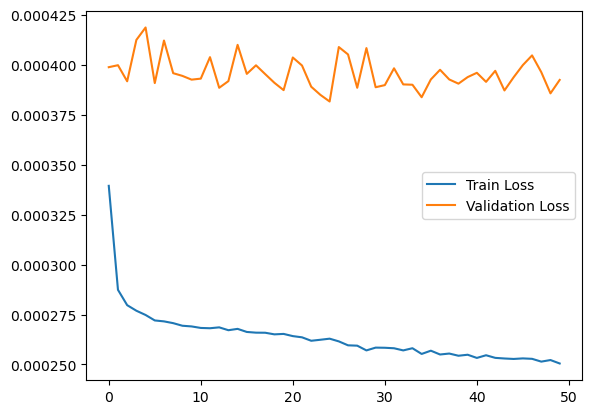

In [18]:
# 학습 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

488/488 [==============================] - 1s 2ms/step - loss: 2.8112e-04
Test Loss: 0.00028111579013057053
488/488 [==============================] - 1s 2ms/step


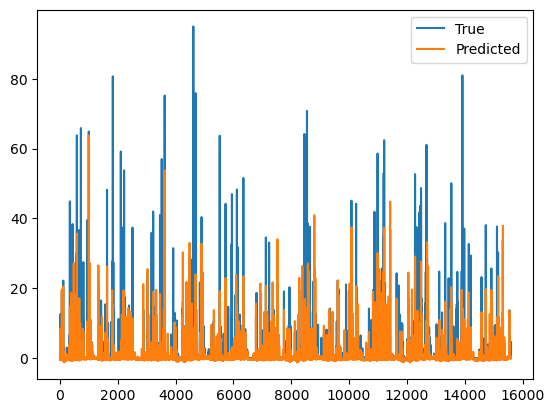

In [19]:
# 모델 평가
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
print(f'Test Loss: {loss}')

# 예측
y_pred_scaled = model.predict(X_test_scaled)

# 스케일링 복원
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test = y_scaler.inverse_transform(y_test_scaled)

# 예측 결과 시각화
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance Metrics:")
print(f"{'Metric':<10}{'Value':<20}")
print(f"{'-'*30}")
print(f"{'RMSE':<10}{rmse:<20.4f}")
print(f"{'MAE':<10}{mae:<20.4f}")
print(f"{'MSE':<10}{mse:<20.4f}")
print(f"{'R²':<10}{r2:<20.4f}")

Model Performance Metrics:
Metric    Value               
------------------------------
RMSE      3.4070              
MAE       1.0063              
MSE       11.6073             
R²        0.3574              


## GRU 유닛 100, 레이어 3개 추가, 드롭아웃 추가, Dense(=relu) 사용

Epoch 1/50
1560/1560 [==============================] - 10s 5ms/step - loss: 3.0690e-04 - val_loss: 4.2917e-04
Epoch 2/50
1560/1560 [==============================] - 7s 5ms/step - loss: 2.8815e-04 - val_loss: 4.0274e-04
Epoch 3/50
1560/1560 [==============================] - 8s 5ms/step - loss: 2.8406e-04 - val_loss: 4.2684e-04
Epoch 4/50
1560/1560 [==============================] - 10s 7ms/step - loss: 2.7909e-04 - val_loss: 4.1935e-04
Epoch 5/50
1560/1560 [==============================] - 11s 7ms/step - loss: 2.7996e-04 - val_loss: 4.0161e-04
Epoch 6/50
1560/1560 [==============================] - 12s 8ms/step - loss: 2.8088e-04 - val_loss: 4.2463e-04
Epoch 7/50
1560/1560 [==============================] - 12s 7ms/step - loss: 2.7740e-04 - val_loss: 4.0705e-04
Epoch 8/50
1560/1560 [==============================] - 12s 8ms/step - loss: 2.7569e-04 - val_loss: 4.0003e-04
Epoch 9/50
1560/1560 [==============================] - 14s 9ms/step - loss: 2.7462e-04 - val_loss: 4.1485e-04
Epo

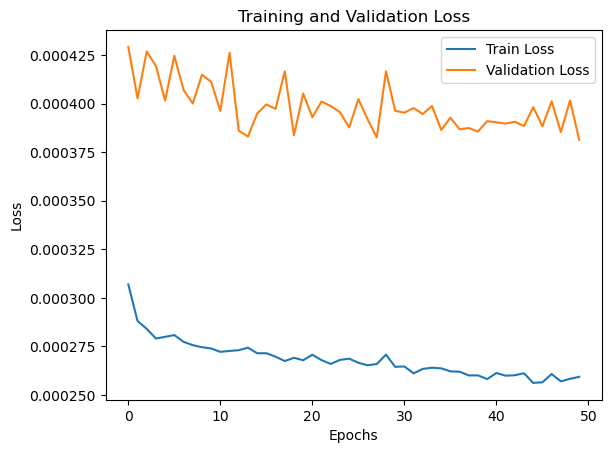

In [22]:
# GRU 모델 정의
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))  # 드롭아웃 추가
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(0.2))  # 드롭아웃 추가
model.add(GRU(units=100))
model.add(Dropout(0.2))  # 드롭아웃 추가
model.add(Dense(50, activation='relu'))  # Dense 레이어 추가
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 학습 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

488/488 [==============================] - 2s 2ms/step - loss: 2.7389e-04
Test Loss: 0.0002738912880886346
488/488 [==============================] - 2s 2ms/step


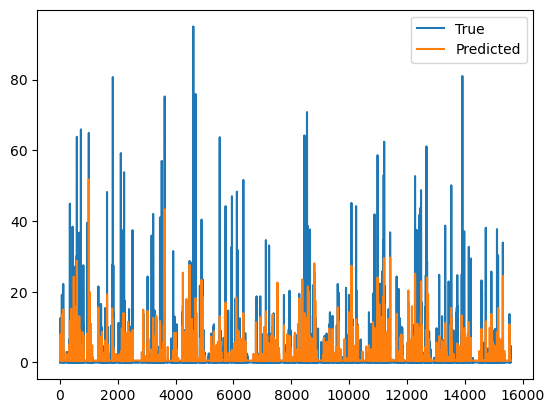

In [28]:
# 모델 평가
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
print(f'Test Loss: {loss}')

# 예측
y_pred_scaled = model.predict(X_test_scaled)

# 스케일링 복원
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test = y_scaler.inverse_transform(y_test_scaled)

# 예측 결과 시각화
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance Metrics:")
print(f"{'Metric':<10}{'Value':<20}")
print(f"{'-'*30}")
print(f"{'RMSE':<10}{rmse:<20.4f}")
print(f"{'MAE':<10}{mae:<20.4f}")
print(f"{'MSE':<10}{mse:<20.4f}")
print(f"{'R²':<10}{r2:<20.4f}")

Model Performance Metrics:
Metric    Value               
------------------------------
RMSE      3.3629              
MAE       1.1598              
MSE       11.3090             
R²        0.3740              


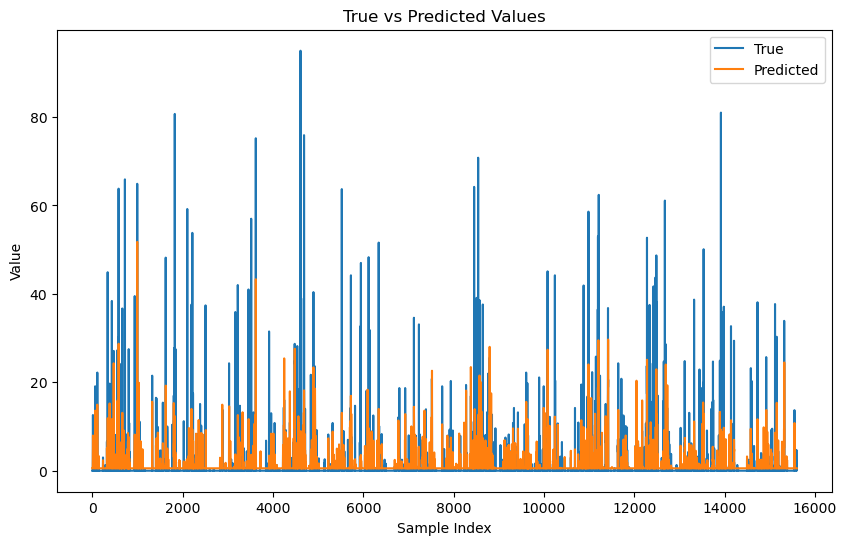

In [30]:
# 예측값과 실제값 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

## GridSearchCV 하이퍼파라미터 튜닝

In [32]:
def create_model(gru_units=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(GRU(units=gru_units, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=gru_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

In [33]:
# KerasRegressor 래퍼 사용
model = KerasRegressor(build_fn=create_model, verbose=0)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'gru_units': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'epochs': [50]  # 에포크 수는 고정
}

C:\Users\yuth9\AppData\Local\Temp\ipykernel_3424\2770155021.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [ ]:
# GridSearchCV 초기화 및 실행
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train_scaled)
print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Best Score (MSE): {-grid_result.best_score_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
